In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('realistic_crm_campaign_data.csv')
data.head()

,Campaign_Name,Campaign_Type,Recipient_ID,Delivery_Status,Open_Status,Click_Status,Conversion_Status,Engagement_Time,Sent_Timestamp,Opened_Timestamp,Clicked_Timestamp,Converted_Timestamp,Recipient_Age,Recipient_Gender,Recipient_Location
0,Black Friday,Email,1,Bounced,Not Opened,Not Clicked,Not Converted,425,2025-01-04 05:34:18,2025-01-08 02:47:11,2025-01-09 14:01:40,NaN,65,Non-Binary,Los Angeles
1,New Product Launch,Email,2,Delivered,Opened,Clicked,Converted,143,2025-01-24 02:49:43,2025-01-24 04:59:23,NaN,NaN,20,Non-Binary,Los Angeles
2,Winter Fest,SMS,3,Delivered,Not Opened,Not Clicked,Not Converted,239,2024-12-28 20:38:18,2025-01-08 00:11:22,NaN,NaN,46,Non-Binary,Los Angeles
3,Summer Sale,Push Notification,4,Delivered,Opened,Clicked,Converted,159,2025-01-06 00:28:42,NaN,NaN,2025-01-22 03:21:13,25,Non-Binary,Houston
4,Black Friday,Email,5,Bounced,Not Opened,Clicked,Converted,436,2025-01-14 10:54:24,2025-01-17 05:51:36,NaN,NaN,33,Male,Miami


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign_Name        1000 non-null   object
 1   Campaign_Type        1000 non-null   object
 2   Recipient_ID         1000 non-null   int64 
 3   Delivery_Status      1000 non-null   object
 4   Open_Status          1000 non-null   object
 5   Click_Status         1000 non-null   object
 6   Conversion_Status    1000 non-null   object
 7   Engagement_Time      1000 non-null   int64 
 8   Sent_Timestamp       1000 non-null   object
 9   Opened_Timestamp     455 non-null    object
 10  Clicked_Timestamp    476 non-null    object
 11  Converted_Timestamp  518 non-null    object
 12  Recipient_Age        1000 non-null   int64 
 13  Recipient_Gender     1000 non-null   object
 14  Recipient_Location   1000 non-null   object
dtypes: int64(3), object(12)
memory usage: 117.3+ KB


In [5]:
data.describe()

,Recipient_ID,Engagement_Time,Recipient_Age
count,1000.000000,1000.000000,1000.000000
mean,500.500000,291.612000,41.957000
std,288.819436,174.609662,13.808687
min,1.000000,0.000000,18.000000
25%,250.750000,146.500000,30.000000
50%,500.500000,281.000000,42.500000
75%,750.250000,442.000000,54.000000
max,1000.000000,599.000000,65.000000


In [6]:
data.isnull().sum()

,0
Campaign_Name,0
Campaign_Type,0
Recipient_ID,0
Delivery_Status,0
Open_Status,0
Click_Status,0
Conversion_Status,0
Engagement_Time,0
Sent_Timestamp,0
Opened_Timestamp,545


In [7]:
missing_percentage = (data.isnull().sum() / len(data)) * 10
missing_percentage

,0
Campaign_Name,0.00
Campaign_Type,0.00
Recipient_ID,0.00
Delivery_Status,0.00
Open_Status,0.00
Click_Status,0.00
Conversion_Status,0.00
Engagement_Time,0.00
Sent_Timestamp,0.00
Opened_Timestamp,5.45


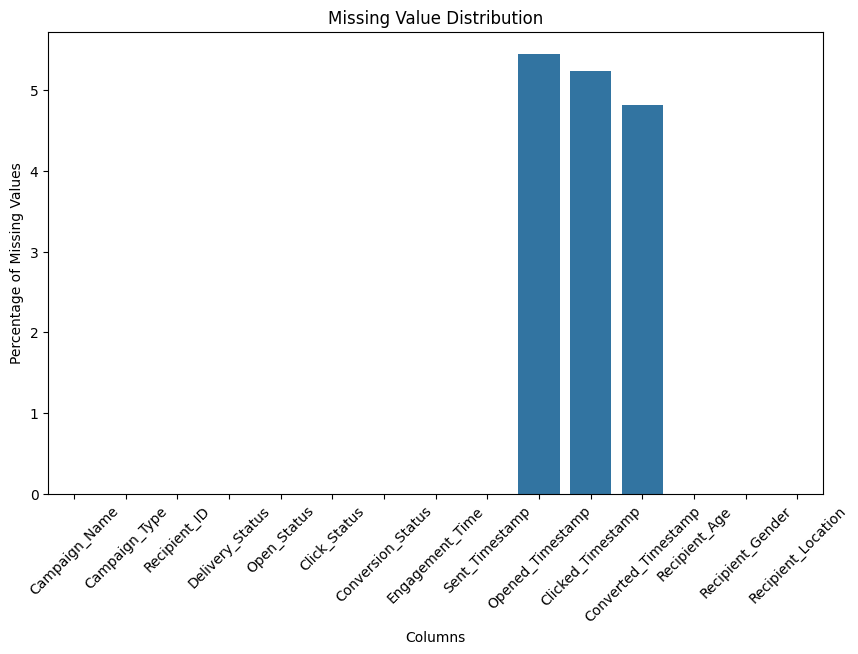

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Value Distribution')
plt.xticks(rotation=45)
plt.show()

In [9]:
data.duplicated().sum()

0

In [10]:
data.fillna({'Opened_Timestamp': 'Not Opened', 'Clicked_Timestamp':'Not Clicked','Converted_Timestamp':'Not Converted'}, inplace=True)

In [11]:
data.isnull().sum()

,0
Campaign_Name,0
Campaign_Type,0
Recipient_ID,0
Delivery_Status,0
Open_Status,0
Click_Status,0
Conversion_Status,0
Engagement_Time,0
Sent_Timestamp,0
Opened_Timestamp,0


In [13]:
data['Click_Through_Rate'] = np.where(
    data['Delivery_Status'] == 'Delivered',
    (data['Click_Status'] == 'Clicked').astype(int),
    np.nan
)

In [14]:
data.head(5)

,Campaign_Name,Campaign_Type,Recipient_ID,Delivery_Status,Open_Status,Click_Status,Conversion_Status,Engagement_Time,Sent_Timestamp,Opened_Timestamp,Clicked_Timestamp,Converted_Timestamp,Recipient_Age,Recipient_Gender,Recipient_Location,Click_Through_Rate
0,Black Friday,Email,1,Bounced,Not Opened,Not Clicked,Not Converted,425,2025-01-04 05:34:18,2025-01-08 02:47:11,2025-01-09 14:01:40,Not Converted,65,Non-Binary,Los Angeles,NaN
1,New Product Launch,Email,2,Delivered,Opened,Clicked,Converted,143,2025-01-24 02:49:43,2025-01-24 04:59:23,Not Clicked,Not Converted,20,Non-Binary,Los Angeles,1.0
2,Winter Fest,SMS,3,Delivered,Not Opened,Not Clicked,Not Converted,239,2024-12-28 20:38:18,2025-01-08 00:11:22,Not Clicked,Not Converted,46,Non-Binary,Los Angeles,0.0
3,Summer Sale,Push Notification,4,Delivered,Opened,Clicked,Converted,159,2025-01-06 00:28:42,Not Opened,Not Clicked,2025-01-22 03:21:13,25,Non-Binary,Houston,1.0
4,Black Friday,Email,5,Bounced,Not Opened,Clicked,Converted,436,2025-01-14 10:54:24,2025-01-17 05:51:36,Not Clicked,Not Converted,33,Male,Miami,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign_Name        1000 non-null   object 
 1   Campaign_Type        1000 non-null   object 
 2   Recipient_ID         1000 non-null   int64  
 3   Delivery_Status      1000 non-null   object 
 4   Open_Status          1000 non-null   object 
 5   Click_Status         1000 non-null   object 
 6   Conversion_Status    1000 non-null   object 
 7   Engagement_Time      1000 non-null   int64  
 8   Sent_Timestamp       1000 non-null   object 
 9   Opened_Timestamp     1000 non-null   object 
 10  Clicked_Timestamp    1000 non-null   object 
 11  Converted_Timestamp  1000 non-null   object 
 12  Recipient_Age        1000 non-null   int64  
 13  Recipient_Gender     1000 non-null   object 
 14  Recipient_Location   1000 non-null   object 
 15  Click_Through_Rate   520 non-null    fl

In [16]:
data.head(100)

,Campaign_Name,Campaign_Type,Recipient_ID,Delivery_Status,Open_Status,Click_Status,Conversion_Status,Engagement_Time,Sent_Timestamp,Opened_Timestamp,Clicked_Timestamp,Converted_Timestamp,Recipient_Age,Recipient_Gender,Recipient_Location,Click_Through_Rate
0,Black Friday,Email,1,Bounced,Not Opened,Not Clicked,Not Converted,425,2025-01-04 05:34:18,2025-01-08 02:47:11,2025-01-09 14:01:40,Not Converted,65,Non-Binary,Los Angeles,NaN
1,New Product Launch,Email,2,Delivered,Opened,Clicked,Converted,143,2025-01-24 02:49:43,2025-01-24 04:59:23,Not Clicked,Not Converted,20,Non-Binary,Los Angeles,1.0
2,Winter Fest,SMS,3,Delivered,Not Opened,Not Clicked,Not Converted,239,2024-12-28 20:38:18,2025-01-08 00:11:22,Not Clicked,Not Converted,46,Non-Binary,Los Angeles,0.0
3,Summer Sale,Push Notification,4,Delivered,Opened,Clicked,Converted,159,2025-01-06 00:28:42,Not Opened,Not Clicked,2025-01-22 03:21:13,25,Non-Binary,Houston,1.0
4,Black Friday,Email,5,Bounced,Not Opened,Clicked,Converted,436,2025-01-14 10:54:24,2025-01-17 05:51:36,Not Clicked,Not Converted,33,Male,Miami,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,New Product Launch,Push Notification,96,Delivered,Opened,Clicked,Not Converted,187,2025-01-10 13:20:09,Not Opened,2025-01-24 17:39:50,2025-01-17 12:37:21,58,Female,New York,1.0
96,Loyalty Program,Email,97,Bounced,Not Opened,Not Clicked,Converted,194,2025-01-23 02:45:26,Not Opened,Not Clicked,Not Converted,19,Non-Binary,New York,NaN
97,Summer Sale,SMS,98,Delivered,Not Opened,Clicked,Converted,88,2025-01-16 18:46:22,Not Opened,Not Clicked,2025-01-12 10:59:00,18,Female,Miami,1.0
98,New Product Launch,Email,99,Delivered,Opened,Not Clicked,Not Converted,590,2024-12-29 20:21:18,2025-01-20 03:11:03,2024-12-30 00:25:07,Not Converted,45,Female,San Francisco,0.0


In [17]:
print(data[['Delivery_Status', 'Click_Status', 'Click_Through_Rate']].head(10))

  Delivery_Status Click_Status  Click_Through_Rate
0         Bounced  Not Clicked                 NaN
1       Delivered      Clicked                 1.0
2       Delivered  Not Clicked                 0.0
3       Delivered      Clicked                 1.0
4         Bounced      Clicked                 NaN
5       Delivered      Clicked                 1.0
6         Bounced      Clicked                 NaN
7       Delivered  Not Clicked                 0.0
8         Bounced  Not Clicked                 NaN
9       Delivered      Clicked                 1.0


In [18]:
data['Click_Through_Rate'].fillna(0, inplace=True)

<ipython-input-18-3dc4044d9cf1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Click_Through_Rate'].fillna(0, inplace=True)


In [19]:
data.head()

,Campaign_Name,Campaign_Type,Recipient_ID,Delivery_Status,Open_Status,Click_Status,Conversion_Status,Engagement_Time,Sent_Timestamp,Opened_Timestamp,Clicked_Timestamp,Converted_Timestamp,Recipient_Age,Recipient_Gender,Recipient_Location,Click_Through_Rate
0,Black Friday,Email,1,Bounced,Not Opened,Not Clicked,Not Converted,425,2025-01-04 05:34:18,2025-01-08 02:47:11,2025-01-09 14:01:40,Not Converted,65,Non-Binary,Los Angeles,0.0
1,New Product Launch,Email,2,Delivered,Opened,Clicked,Converted,143,2025-01-24 02:49:43,2025-01-24 04:59:23,Not Clicked,Not Converted,20,Non-Binary,Los Angeles,1.0
2,Winter Fest,SMS,3,Delivered,Not Opened,Not Clicked,Not Converted,239,2024-12-28 20:38:18,2025-01-08 00:11:22,Not Clicked,Not Converted,46,Non-Binary,Los Angeles,0.0
3,Summer Sale,Push Notification,4,Delivered,Opened,Clicked,Converted,159,2025-01-06 00:28:42,Not Opened,Not Clicked,2025-01-22 03:21:13,25,Non-Binary,Houston,1.0
4,Black Friday,Email,5,Bounced,Not Opened,Clicked,Converted,436,2025-01-14 10:54:24,2025-01-17 05:51:36,Not Clicked,Not Converted,33,Male,Miami,0.0


In [20]:
data.isnull().sum()

,0
Campaign_Name,0
Campaign_Type,0
Recipient_ID,0
Delivery_Status,0
Open_Status,0
Click_Status,0
Conversion_Status,0
Engagement_Time,0
Sent_Timestamp,0
Opened_Timestamp,0


In [22]:
delivered_data = data[data['Delivery_Status']=='Delivered']
delivered_data

,Campaign_Name,Campaign_Type,Recipient_ID,Delivery_Status,Open_Status,Click_Status,Conversion_Status,Engagement_Time,Sent_Timestamp,Opened_Timestamp,Clicked_Timestamp,Converted_Timestamp,Recipient_Age,Recipient_Gender,Recipient_Location,Click_Through_Rate
1,New Product Launch,Email,2,Delivered,Opened,Clicked,Converted,143,2025-01-24 02:49:43,2025-01-24 04:59:23,Not Clicked,Not Converted,20,Non-Binary,Los Angeles,1.0
2,Winter Fest,SMS,3,Delivered,Not Opened,Not Clicked,Not Converted,239,2024-12-28 20:38:18,2025-01-08 00:11:22,Not Clicked,Not Converted,46,Non-Binary,Los Angeles,0.0
3,Summer Sale,Push Notification,4,Delivered,Opened,Clicked,Converted,159,2025-01-06 00:28:42,Not Opened,Not Clicked,2025-01-22 03:21:13,25,Non-Binary,Houston,1.0
5,Summer Sale,Email,6,Delivered,Not Opened,Clicked,Converted,405,2025-01-02 12:44:52,Not Opened,2025-01-19 21:35:53,2025-01-13 07:20:23,31,Female,Chicago,1.0
7,Summer Sale,Push Notification,8,Delivered,Opened,Not Clicked,Converted,280,2025-01-06 08:46:53,Not Opened,Not Clicked,2025-01-07 09:02:29,48,Non-Binary,Miami,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,New Product Launch,Push Notification,993,Delivered,Not Opened,Clicked,Converted,577,2025-01-05 20:10:45,Not Opened,Not Clicked,2024-12-28 22:50:30,29,Non-Binary,Miami,1.0
994,Black Friday,Email,995,Delivered,Opened,Not Clicked,Converted,279,2025-01-04 06:27:00,2025-01-23 04:35:54,2025-01-15 18:23:26,Not Converted,21,Male,Chicago,0.0
996,New Product Launch,SMS,997,Delivered,Opened,Not Clicked,Not Converted,465,2025-01-18 12:59:20,2025-01-13 21:57:46,2025-01-19 17:32:52,2025-01-12 23:41:11,31,Non-Binary,San Francisco,0.0
998,Winter Fest,SMS,999,Delivered,Opened,Not Clicked,Converted,198,2025-01-10 23:28:40,Not Opened,Not Clicked,2025-01-03 12:16:55,33,Female,Chicago,0.0


In [26]:
total_clicks = delivered_data['Click_Through_Rate'].sum()
total_clicks

269.0

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign_Name        1000 non-null   object 
 1   Campaign_Type        1000 non-null   object 
 2   Recipient_ID         1000 non-null   int64  
 3   Delivery_Status      1000 non-null   object 
 4   Open_Status          1000 non-null   object 
 5   Click_Status         1000 non-null   object 
 6   Conversion_Status    1000 non-null   object 
 7   Engagement_Time      1000 non-null   int64  
 8   Sent_Timestamp       1000 non-null   object 
 9   Opened_Timestamp     1000 non-null   object 
 10  Clicked_Timestamp    1000 non-null   object 
 11  Converted_Timestamp  1000 non-null   object 
 12  Recipient_Age        1000 non-null   int64  
 13  Recipient_Gender     1000 non-null   object 
 14  Recipient_Location   1000 non-null   object 
 15  Click_Through_Rate   1000 non-null   fl

In [27]:
total_delivered = len(delivered_data)
total_delivered

520

In [28]:
overall_CTR = (total_clicks / total_delivered) * 100
overall_CTR

51.73076923076923

In [21]:
data.to_csv("processed_crm_data.csv", index=False)

In [29]:
df = pd.read_csv("processed_crm_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign_Name        1000 non-null   object 
 1   Campaign_Type        1000 non-null   object 
 2   Recipient_ID         1000 non-null   int64  
 3   Delivery_Status      1000 non-null   object 
 4   Open_Status          1000 non-null   object 
 5   Click_Status         1000 non-null   object 
 6   Conversion_Status    1000 non-null   object 
 7   Engagement_Time      1000 non-null   int64  
 8   Sent_Timestamp       1000 non-null   object 
 9   Opened_Timestamp     1000 non-null   object 
 10  Clicked_Timestamp    1000 non-null   object 
 11  Converted_Timestamp  1000 non-null   object 
 12  Recipient_Age        1000 non-null   int64  
 13  Recipient_Gender     1000 non-null   object 
 14  Recipient_Location   1000 non-null   object 
 15  Click_Through_Rate   1000 non-null   fl